## **Detection of Fake News**

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import string
import nltk
import sklearn
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head(6)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0


In [ ]:
df.tail(6)

,id,title,author,text,label
20794,20794,Trump: Putin ’Very Smart’ to Not Retaliate ove...,Lee Stranahan,Donald Trump took to Twitter Friday to praise ...,0
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [ ]:
df.shape

(20800, 5)

In [ ]:
df.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [ ]:
df['News'] = df['title'].str.cat(df['text'], sep=" ")

In [ ]:
df.head()

,id,title,author,text,label,News
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Why the Trut...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [ ]:
df = df.drop(['text','author','id','title'],axis=1)

In [ ]:
df.head()

,label,News
0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,1,Why the Truth Might Get You Fired Why the Trut...
3,1,15 Civilians Killed In Single US Airstrike Hav...
4,1,Iranian woman jailed for fictional unpublished...


In [ ]:
df.isnull()

,label,News
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
20795,False,False
20796,False,False
20797,False,False
20798,False,False


In [ ]:
#check for missing/null values
df.isnull().values.any()
df.isnull().sum()

label      0
News     597
dtype: int64

In [ ]:
#drop missing/null values
df=df.dropna()

In [ ]:
df.isnull().sum()

label    0
News     0
dtype: int64

In [ ]:
new_df = df.copy()
new_df.reset_index(inplace = True)
new_df.head()

,index,label,News
0,0,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,1,Why the Truth Might Get You Fired Why the Trut...
3,3,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,1,Iranian woman jailed for fictional unpublished...


In [ ]:
new_df.shape

(20203, 3)

In [ ]:
X = new_df['News']
y = new_df['label']

In [ ]:
X.shape

(20203,)

In [ ]:
X = X.reset_index()

In [ ]:
X = X.drop(['index'], axis =1)
X.head(7)

,News
0,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,Why the Truth Might Get You Fired Why the Trut...
3,15 Civilians Killed In Single US Airstrike Hav...
4,Iranian woman jailed for fictional unpublished...
5,Jackie Mason: Hollywood Would Love Trump if He...
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...


In [ ]:
X.tail()

,News
20198,Rapper T.I.: Trump a ’Poster Child For White S...
20199,"N.F.L. Playoffs: Schedule, Matchups and Odds -..."
20200,Macy’s Is Said to Receive Takeover Approach by...
20201,"NATO, Russia To Hold Parallel Exercises In Bal..."
20202,What Keeps the F-35 Alive David Swanson is a...


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
PS = PorterStemmer()
corpus = []

for i in range(0, len(new_df)):
  #remove special characters
  txt = re.sub('[^a-zA-Z0-9]', ' ', X['News'][i])

  #remove punctutaions
  txt = txt.translate(str.maketrans('', '', string.punctuation))

  #convert to lowerase
  txt = txt.lower()
  txt = txt.split() 

  #remove stopwords and stemming
  txt_out = [PS.stem(word) for word in txt if not word in stopwords.words('english')]
  txt_out = ' '.join(txt_out)
  corpus.append(txt_out)


In [ ]:
corpus[6]

'life life luxuri elton john 6 favorit shark pictur stare long transcontinent flight ever wonder britain icon pop pianist get long flight six pictur shark sir elton john like stare pass time airplan 1 shark swim sit next elton john flight see man live lap luxuri immedi tape photo shark dart ocean window stare throughout trip platinum sell artist known pull window shade make shark disappear quickli retract mark anim triumphant return often repeat act dozen time per flight 2 great white shark leap air intern pop sensat worth estim 450 million peopl go extra mile make happi flight crew instruct place photo breach great white elton john seat back pocket even board plane five time grammi winner love pull imag leisur stare fli sometim hold mere 3 4 inch away face fixat upon shark beadi eye 3 shark prowl rumor elton john first acquir shark photo 1997 fli london perform candl wind princess diana funer stapl travel routin ever sinc flown music legend say sir elton turn everi singl overhead ligh

In [ ]:
from wordcloud import WordCloud

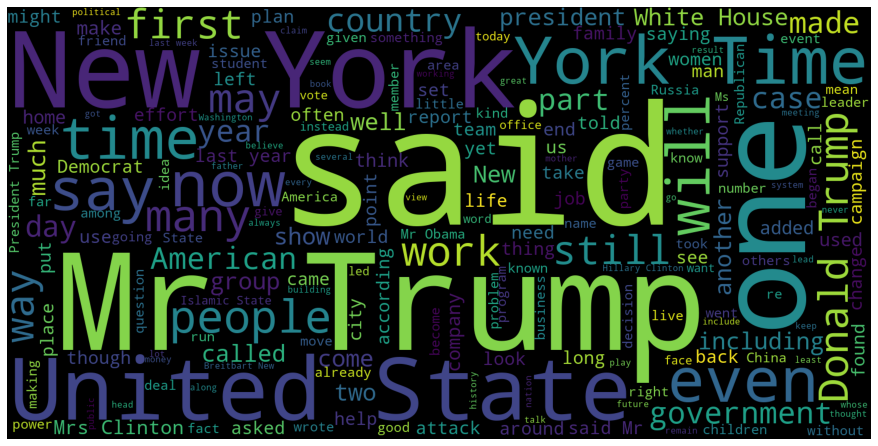

In [ ]:
fake = WordCloud(background_color='black', height = 800, width = 1600).generate(' '.join(new_df[new_df['label']==0]['News']))

plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(fake)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')
plt.show()

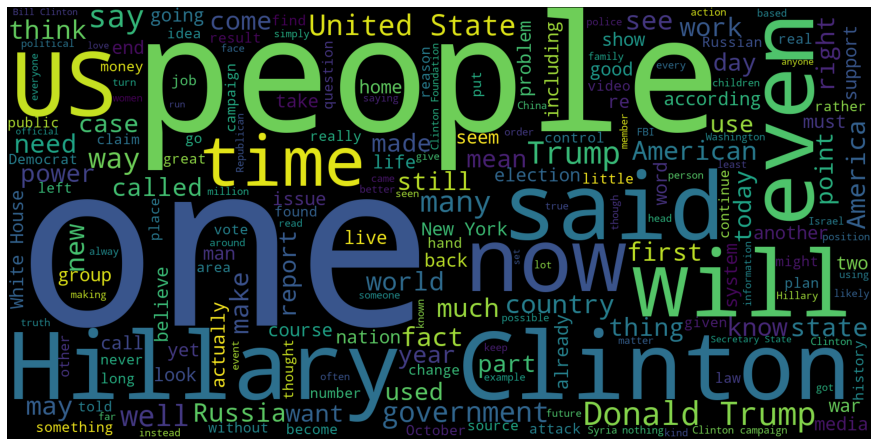

In [ ]:
real = WordCloud(background_color='black', height = 800, width = 1600).generate(' '.join(new_df[new_df['label']==1]['News']))

plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(real)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()  

In [ ]:
X.shape

(20203, 5000)

In [ ]:
y.shape


(20203,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#splitting the data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
import itertools

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:

def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Test accuracy:  0.9052214798317249
Confusion matrix, without normalization


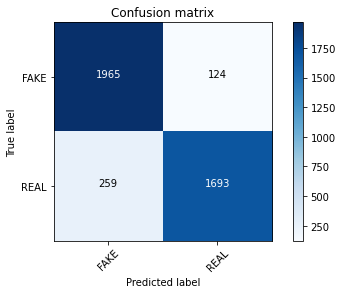

In [ ]:
#using Multinomail Naive Bayes and checking Training accuracy score
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(X_train,y_train)
y_pred = NB.predict(X_test)
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
accuracy = cross_val_score(NB,X_train,y_train,cv=3)
print(accuracy)
print(accuracy.mean())

[0.90293244 0.9056989  0.90904028]
0.9058905431320795


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2089
           1       0.93      0.87      0.90      1952

    accuracy                           0.91      4041
   macro avg       0.91      0.90      0.90      4041
weighted avg       0.91      0.91      0.91      4041



Test accuracy:  0.9678297451125959
Confusion matrix, without normalization


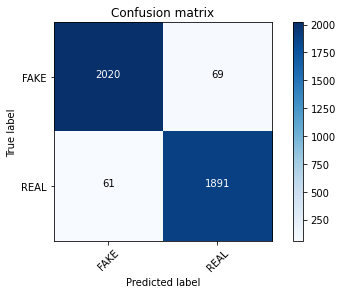

In [ ]:
#using Linear support vector classification and checking Training accuracy score
from sklearn.svm import LinearSVC
LSVC = LinearSVC()

LSVC.fit(X_train, y_train)
y_pred1 = LSVC.predict(X_test)
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred1))
cm = metrics.confusion_matrix(y_test, y_pred1)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
accuracy = cross_val_score(LSVC,X_train,y_train,cv=3)
print(accuracy)
print(accuracy.mean())

[0.96250928 0.96602933 0.96250232]
0.9636803100501279


In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2089
           1       0.96      0.97      0.97      1952

    accuracy                           0.97      4041
   macro avg       0.97      0.97      0.97      4041
weighted avg       0.97      0.97      0.97      4041



Test accuracy:  0.9609007671368474
Confusion matrix, without normalization


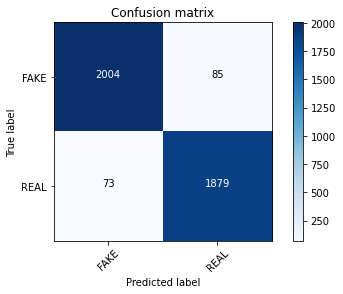

In [ ]:
#using Logistic Regression and checking Training accuracy score
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred2 = LR.predict(X_test)
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred2))
cm = metrics.confusion_matrix(y_test, y_pred2)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
accuracy = cross_val_score(LR,X_train,y_train,cv=3)
print(accuracy)
print(accuracy.mean())

[0.95174462 0.95971784 0.9560052 ]
0.955822551536559


In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      2089
           1       0.96      0.96      0.96      1952

    accuracy                           0.96      4041
   macro avg       0.96      0.96      0.96      4041
weighted avg       0.96      0.96      0.96      4041



Test accuracy:  0.9445681761940113
Confusion matrix, without normalization


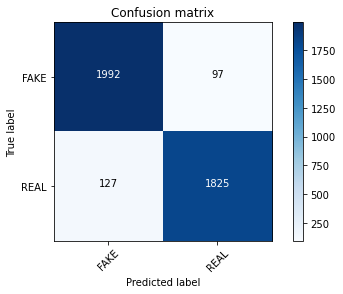

In [ ]:
#using Decision Tree Classification and checking Training accuracy score
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(X_train,y_train)
y_pred3 = DTC.predict(X_test)
print("Test accuracy: ",metrics.accuracy_score(y_test, y_pred3))
cm = metrics.confusion_matrix(y_test, y_pred3)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
accuracy = cross_val_score(DTC,X_train,y_train,cv=3)
print(accuracy)
print(accuracy.mean())

[0.93671121 0.93502877 0.94338222]
0.9383740665051606


In [ ]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2089
           1       0.95      0.93      0.94      1952

    accuracy                           0.94      4041
   macro avg       0.94      0.94      0.94      4041
weighted avg       0.94      0.94      0.94      4041



In [ ]:
test_df = pd.read_csv('/content/test.csv')

In [ ]:
test_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [ ]:
test_df.tail()

,id,title,author,text
5195,25995,The Bangladeshi Traffic Jam That Never Ends - ...,Jody Rosen,Of all the dysfunctions that plague the world’...
5196,25996,John Kasich Signs One Abortion Bill in Ohio bu...,Sheryl Gay Stolberg,WASHINGTON — Gov. John Kasich of Ohio on Tu...
5197,25997,"California Today: What, Exactly, Is in Your Su...",Mike McPhate,Good morning. (Want to get California Today by...
5198,25998,300 US Marines To Be Deployed To Russian Borde...,NaN,« Previous - Next » 300 US Marines To Be Deplo...
5199,25999,"Awkward Sex, Onscreen and Off - The New York T...",Teddy Wayne,Perhaps you’ve seen the new TV series whose pi...


In [ ]:
test_df.describe()

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [ ]:
test_df.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [ ]:
test_df['News'] = test_df['title'].str.cat(test_df['text'], sep=" ")

In [ ]:
test_df = test_df.drop(['text','author','id','title'],axis=1)

In [ ]:
test_df.tail()

,News
5195,The Bangladeshi Traffic Jam That Never Ends - ...
5196,John Kasich Signs One Abortion Bill in Ohio bu...
5197,"California Today: What, Exactly, Is in Your Su..."
5198,300 US Marines To Be Deployed To Russian Borde...
5199,"Awkward Sex, Onscreen and Off - The New York T..."


In [ ]:
test_df.shape

(5200, 1)

In [ ]:
test_df.isnull()

,News
0,False
1,False
2,False
3,False
4,False
...,...
5195,False
5196,False
5197,False
5198,False


In [ ]:
test_df.isnull().values.any()
test_df.isnull().sum()

News    129
dtype: int64

In [ ]:
test_df = test_df.dropna()

In [ ]:
test_df.isnull().sum()

News    0
dtype: int64

In [ ]:
test_df.shape

(5071, 1)

In [ ]:
new_df_test = test_df.copy()
new_df_test.reset_index(inplace = True)
new_df_test.head()

,index,News
0,0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,1,Russian warships ready to strike terrorists ne...
2,2,#NoDAPL: Native American Leaders Vow to Stay A...
3,3,"Tim Tebow Will Attempt Another Comeback, This ..."
4,4,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


In [ ]:
new_df_test = new_df_test.drop(['index'],axis=1)
new_df_test.head()

,News
0,"Specter of Trump Loosens Tongues, if Not Purse..."
1,Russian warships ready to strike terrorists ne...
2,#NoDAPL: Native American Leaders Vow to Stay A...
3,"Tim Tebow Will Attempt Another Comeback, This ..."
4,Keiser Report: Meme Wars (E995) 42 mins ago 1 ...


In [ ]:
PS = PorterStemmer()
corpus_test = []

for i in range(0, len(new_df_test)):
  #remove special characters
  txt = re.sub('[^a-zA-Z0-9]', ' ', new_df_test['News'][i])

  #remove punctutaions
  txt = txt.translate(str.maketrans('', '', string.punctuation))

  #convert to lowerase
  txt = txt.lower()
  txt = txt.split() 

  #remove stopwords and stemming
  txt_out = [PS.stem(word) for word in txt if not word in stopwords.words('english')]
  txt_out = ' '.join(txt_out)
  corpus_test.append(txt_out)

In [ ]:
X_test_data=tfidf_v.fit_transform(corpus_test).toarray()

In [ ]:
X_test_data.shape

(5071, 5000)

In [ ]:
#Used Linear SVC as it produced best results for train data 
y_test_data_pred = LSVC.predict(X_test_data)

In [ ]:
y_test_data_pred

array([1, 0, 1, ..., 1, 1, 1])